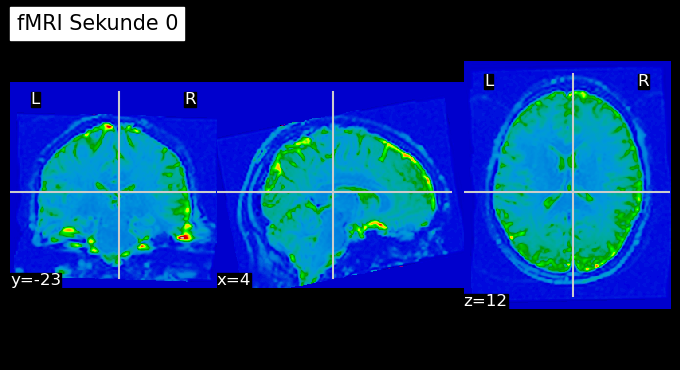

In [10]:
# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib  # Für das Lesen von fMRI-Daten
from nilearn import plotting  # Für die Visualisierung der Gehirnaktivität
from nilearn.connectome import ConnectivityMeasure  # Für die Berechnung der Functional Connectomes

# Lade die fMRI-Daten
file_path = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz/100307/T1w/Results/rfMRI_REST1_LR/PhaseOne_gdc_dc.nii.gz"  # "Pfad_zur_Datei/fMRI_Daten.nii.gz"
fmri_img = nib.load(file_path)

# Visualisiere ein Beispielbild der fMRI-Daten
plotting.plot_epi(fmri_img.slicer[:, :, :, 0], title='fMRI Sekunde 0')



In [13]:
fmri_img.shape


(260, 311, 260, 3)

In [14]:
from nilearn import datasets
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels


Dataset created in /Users/thomaspfaffinger/nilearn_data/fsl



Downloaded 24985600 of 25716861 bytes (97.2%,    0.3s remaining) ...done. (10 seconds, 0 min)
Extracting data from /Users/thomaspfaffinger/nilearn_data/fsl/c4d84bbdf5c3325f23e304cdea1e9706/HarvardOxford.tgz..... done.


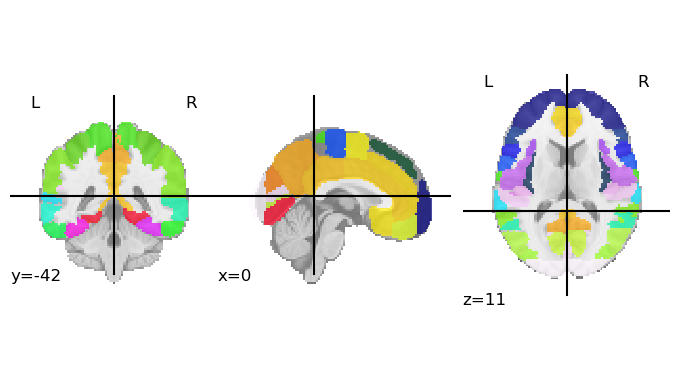

In [17]:
plotting.plot_roi(atlas_filename)

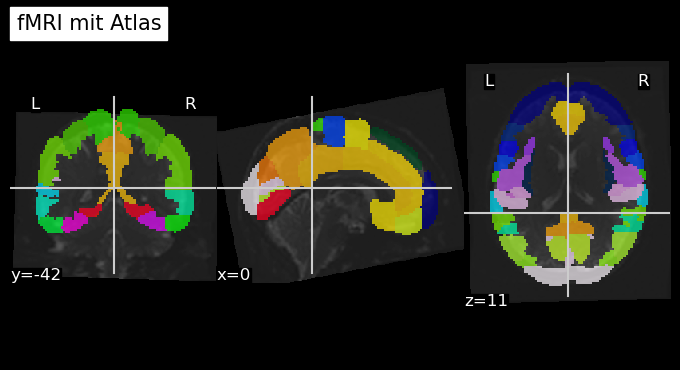

In [19]:
from nilearn import plotting
plotting.plot_roi(atlas_filename, bg_img=fmri_img.slicer[:, :, :, 0], title='fMRI mit Atlas')

In [21]:
from nilearn.maskers import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)

#### ???????? ####

time_series = masker.fit_transform(fmri_img, confounds=confounds_dataframe)

NameError: name 'confounds_dataframe' is not defined

In [ ]:
# Definiere die Regionen des Gehirns für die Connectome-Analyse
atlas = "Pfad_zur_atlas_Datei/atlas.nii.gz"
atlas_img = nib.load(atlas)

# Berechne die Functional Connectomes
connectome_measure = ConnectivityMeasure(kind='correlation')
connectome_data = connectome_measure.fit_transform([fmri_img])

# Visualisiere ein Beispiel-Connectome
plt.figure(figsize=(8, 6))
plt.imshow(connectome_data[0], cmap='viridis', interpolation='nearest')
plt.colorbar(label='Korrelation')
plt.title('Functional Connectome Beispiel')
plt.show()

# Führe statistische Analysen auf den Functional Connectomes durch
# Hier könnten Sie verschiedene Analysen wie Netzwerk-Metriken, Gruppenvergleiche usw. durchführen

